In [15]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd

import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import cartopy.feature as feature

In [16]:
path = '/home/cshu2/clim680/'
fname = 'PM10_202207.nc'
ds = xr.open_dataset(path+fname)
ds

<xarray.Dataset>
Dimensions:  (day: 31, time: 24, lay: 35, lat: 265, lon: 442)
Coordinates:
  * day      (day) int32 1 2 3 4 5 6 7 8 9 10 ... 22 23 24 25 26 27 28 29 30 31
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 ... 15 16 17 18 19 20 21 22 23 24
  * lay      (lay) int32 1 2 3 4 5 6 7 8 9 10 ... 26 27 28 29 30 31 32 33 34 35
  * lat      (lat) float32 21.83 21.93 22.03 22.13 ... 48.47 48.57 48.67 48.77
  * lon      (lon) float32 -120.6 -120.5 -120.4 -120.3 ... -71.01 -70.91 -70.8
Data variables:
    PM       (day, time, lay, lat, lon) float32 ...

In [17]:
ds_climo = ds.groupby('time').mean('day')
ds_climo

<xarray.Dataset>
Dimensions:  (time: 24, lay: 35, lat: 265, lon: 442)
Coordinates:
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 ... 15 16 17 18 19 20 21 22 23 24
  * lay      (lay) int32 1 2 3 4 5 6 7 8 9 10 ... 26 27 28 29 30 31 32 33 34 35
  * lat      (lat) float32 21.83 21.93 22.03 22.13 ... 48.47 48.57 48.67 48.77
  * lon      (lon) float32 -120.6 -120.5 -120.4 -120.3 ... -71.01 -70.91 -70.8
Data variables:
    PM       (time, lay, lat, lon) float32 8.608 8.738 8.881 ... 0.0472 0.04708

In [18]:
ds_index = ds_climo.groupby('time').mean('lon').mean('lat')
ds_index

<xarray.Dataset>
Dimensions:  (time: 24, lay: 35)
Coordinates:
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 ... 15 16 17 18 19 20 21 22 23 24
  * lay      (lay) int32 1 2 3 4 5 6 7 8 9 10 ... 26 27 28 29 30 31 32 33 34 35
Data variables:
    PM       (time, lay) float32 10.69 8.939 7.505 ... 0.1132 0.08816 0.06201

In [19]:
print(ds_index['PM'][:,0])

<xarray.DataArray 'PM' (time: 24)>
array([10.692444 ,  9.615708 ,  8.669176 ,  8.038873 ,  7.555211 ,
        7.2108502,  6.98018  ,  6.790041 ,  6.634516 ,  6.5357466,
        6.502878 ,  6.563547 ,  6.775763 ,  7.186423 ,  7.801137 ,
        8.50836  ,  9.167203 ,  9.733573 , 10.17926  , 10.553261 ,
       10.888492 , 11.144383 , 11.274274 , 11.179525 ], dtype=float32)
Coordinates:
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 ... 15 16 17 18 19 20 21 22 23 24
    lay      int32 1


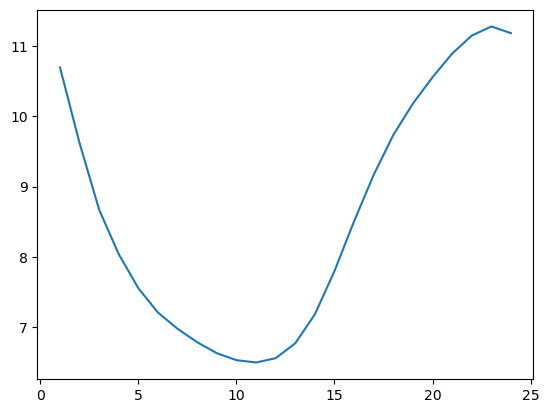

In [20]:
plt.plot(ds_index['time'],ds_index['PM'][:,0]) 

In [21]:
high   = ds_index['PM'][:,0].where(ds_index['PM'][:,0]>=10) 
medium = ds_index['PM'][:,0].where((ds_index['PM'][:,0]<10)&(ds_index['PM'][:,0]>7))
low    = ds_index['PM'][:,0].where(ds_index['PM'][:,0]<= 7)

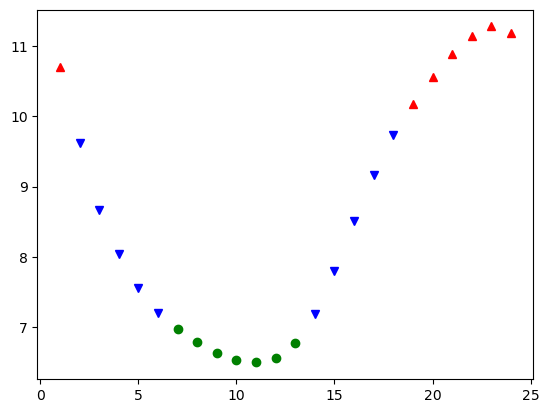

In [22]:
plt.plot(ds_index['time'],high,  'r^')
plt.plot(ds_index['time'],medium,'bv')
plt.plot(ds_index['time'],low,   'go') 

In [23]:
print('High: '  ,high.count(dim='time').values)
print('Medium: ',medium.count(dim='time').values)
print('Low: '   ,low.count(dim='time').values)

counts=[high.count(dim='time').values,
        medium.count(dim='time').values,
        low.count(dim='time').values,
        ]
print(counts)

High:  7
Medium:  10
Low:  7
[array(7), array(10), array(7)]


In [24]:
ds_climo

<xarray.Dataset>
Dimensions:  (time: 24, lay: 35, lat: 265, lon: 442)
Coordinates:
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 ... 15 16 17 18 19 20 21 22 23 24
  * lay      (lay) int32 1 2 3 4 5 6 7 8 9 10 ... 26 27 28 29 30 31 32 33 34 35
  * lat      (lat) float32 21.83 21.93 22.03 22.13 ... 48.47 48.57 48.67 48.77
  * lon      (lon) float32 -120.6 -120.5 -120.4 -120.3 ... -71.01 -70.91 -70.8
Data variables:
    PM       (time, lay, lat, lon) float32 8.608 8.738 8.881 ... 0.0472 0.04708

In [25]:
ds_climo=ds_climo.isel(lay=0)
ds_climo

<xarray.Dataset>
Dimensions:  (time: 24, lat: 265, lon: 442)
Coordinates:
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 ... 15 16 17 18 19 20 21 22 23 24
    lay      int32 1
  * lat      (lat) float32 21.83 21.93 22.03 22.13 ... 48.47 48.57 48.67 48.77
  * lon      (lon) float32 -120.6 -120.5 -120.4 -120.3 ... -71.01 -70.91 -70.8
Data variables:
    PM       (time, lat, lon) float32 8.608 8.738 8.881 ... 5.723 4.709 3.715

In [26]:
ds_climo.drop_vars('lay')
ds_climo

<xarray.Dataset>
Dimensions:  (time: 24, lat: 265, lon: 442)
Coordinates:
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 ... 15 16 17 18 19 20 21 22 23 24
    lay      int32 1
  * lat      (lat) float32 21.83 21.93 22.03 22.13 ... 48.47 48.57 48.67 48.77
  * lon      (lon) float32 -120.6 -120.5 -120.4 -120.3 ... -71.01 -70.91 -70.8
Data variables:
    PM       (time, lat, lon) float32 8.608 8.738 8.881 ... 5.723 4.709 3.715

In [29]:
high_PM   = ds_climo.sel(time=high.dropna(dim='time')['time']).mean(dim='time')
medium_PM = ds_climo.sel(time=medium.dropna(dim='time')['time']).mean(dim='time')
low_PM    = ds_climo.sel(time=low.dropna(dim='time')['time']).mean(dim='time')

comp_PM = [high_PM['PM'],medium_PM['PM'],low_PM['PM']]
comp_PM

[<xarray.DataArray 'PM' (lat: 265, lon: 442)>
 array([[8.966146 , 8.97154  , 9.031692 , ..., 3.884565 , 3.1979735,
         1.9687259],
        [9.071338 , 9.122265 , 9.149637 , ..., 3.7992427, 3.1637897,
         1.9558576],
        [8.637167 , 8.735993 , 8.7979555, ..., 3.6158617, 3.033294 ,
         1.9085151],
        ...,
        [1.4951333, 1.7400423, 1.8917294, ..., 7.2026486, 6.542215 ,
         5.7791705],
        [1.379926 , 1.5750972, 1.686538 , ..., 5.7219024, 4.6879616,
         3.7516098],
        [1.1461533, 1.2837766, 1.3551328, ..., 5.306258 , 4.408519 ,
         3.6338694]], dtype=float32)
 Coordinates:
     lay      int32 1
   * lat      (lat) float32 21.83 21.93 22.03 22.13 ... 48.47 48.57 48.67 48.77
   * lon      (lon) float32 -120.6 -120.5 -120.4 -120.3 ... -71.01 -70.91 -70.8,
 <xarray.DataArray 'PM' (lat: 265, lon: 442)>
 array([[9.562925 , 9.565811 , 9.519849 , ..., 3.8910108, 3.2094948,
         1.9702059],
        [9.392119 , 9.411078 , 9.38751  , ..., 3.815

In [35]:
import matplotlib.colors as colors
import cartopy.feature as cfeature
import matplotlib

# Make the figure larger
fig = plt.figure(figsize=(11,6.5))

from matplotlib.cm import ScalarMappable

clevs = [0,4,8,12,16,20,30,40,60,80,100,200,500,1000]
colorslist = ['white','blue','green','yellow','red']
colormap = colors.LinearSegmentedColormap.from_list('123',colorslist,N=13)

norm = matplotlib.colors.BoundaryNorm(clevs,len(clevs))


<Figure size 1100x650 with 0 Axes>

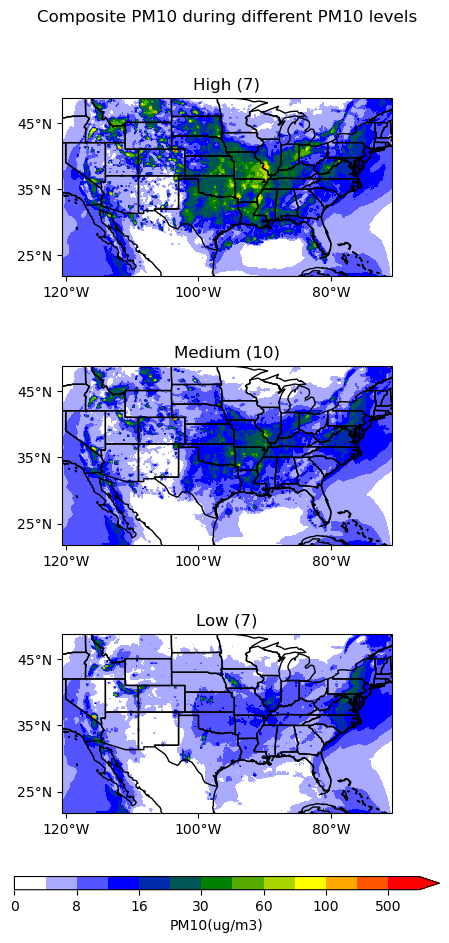

In [40]:
labels=['High','Medium', 'Low']

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array (just 3 rows)
axs = axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,3,1):
    
        # Select the season
        data = comp_PM[i]

        # Contour plot
        cs=axs[i].contourf(
                        comp_PM[i]['lon'],
                        comp_PM[i]['lat'],
                        data,
                        clevs,
                        cmap = colormap,
                        norm = norm,
                        extend='max',
                        transform = ccrs.PlateCarree(),
        )

       # Longitude labels
        axs[i].set_xticks(np.arange(-120,-69,20), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(25,51,10), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i]+' ('+str(counts[i])+')')

        # Draw the coastines for each subplot
        axs[i].coastlines()
        axs[i].add_feature(cfeature.STATES.with_scale('110m'))
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

# Draw the colorbar
cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='PM10(ug/m3)')

# Add a big title at the top
plt.suptitle('Composite PM10 during different PM10 levels') ;